In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


In [2]:
from PyEyeSim import pyeyesim_func as pysim


In [2]:
from PyEyeSim import pyeyesim_func_obj as pysim_o


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
MemoryStudy=0
GenderStudy=1
Mac=0  # set to 1 for macbook path, 0 for PC path
if GenderStudy:
    if Mac:
        Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIFemalePaint.csv'
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:
    if Mac:
        Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Documents\\EyeTracking\\WilmKonigDatabase\\MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if MemoryStudy:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

,Unnamed: 0,Unnamed: 0.1,subjectID,Number,GazePoints,mean_x,mean_y,radius,Cluster,Painting,PartGend,Gaze Points,Radius
0,0,0,G_001,1.0,30.0,1231.0,860.0,19.9396,0.0,Bellini_Halbakt,Male,NaN,NaN
1,1,1,G_001,2.0,13.0,1242.0,412.0,25.8158,0.0,Bellini_Halbakt,Male,NaN,NaN
2,2,2,G_001,3.0,20.0,1255.0,419.0,37.4225,0.0,Bellini_Halbakt,Male,NaN,NaN
3,3,3,G_001,4.0,31.0,1270.0,440.0,25.6350,0.0,Bellini_Halbakt,Male,NaN,NaN
4,4,4,G_001,5.0,48.0,1045.0,751.0,37.7525,0.0,Bellini_Halbakt,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,28411,3714,P74_VF,74.0,36.0,823.0,656.0,23.1638,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51611,28412,3715,P74_VF,75.0,22.0,850.0,658.0,20.8895,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51612,28413,3716,P74_VF,76.0,14.0,828.0,668.0,27.6424,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51613,28414,3717,P74_VF,77.0,17.0,825.0,659.0,28.2337,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN


In [24]:
MyDat=pysim_o.EyeData('GenderStudy','Within',FixData,sizeX,sizeY)

Fixation dataset GenderStudy
dataset size:  (51615, 13)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .columnNames(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y


In [25]:
MyDat.columnNames(StimName='Painting')

Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
fixation duration not asked for
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.5  +/-  53.0  pixels
Mean Y location:  771.5  +/-  78.3  pixels


(array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
        'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
        'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
        'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
        'Wittmann_Selbstbildnis'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

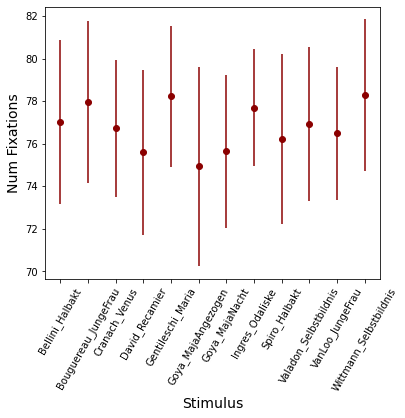

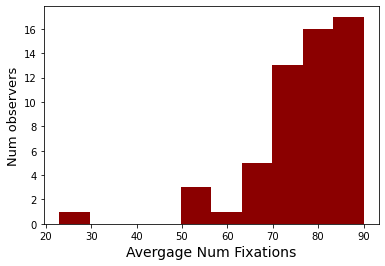

In [20]:
MyDat.RunDescriptiveFix(Visual=1,duration=0)

In [23]:
print(hasattr(MyDat,'Entropies'))

True


In [ ]:
print(hasattr(MyDat,'Entropies'))

Conditions ['Female' 'Male']
0 Bellini_Halbakt 5.65 maximum entropy 6.93
1 Bouguereau_JungeFrau 5.09 maximum entropy 5.97
2 Cranach_Venus 5.24 maximum entropy 6.27
3 David_Recamier 5.62 maximum entropy 6.93
4 Gentileschi_Maria 5.91 maximum entropy 6.97


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


5 Goya_MajaAngezogen 5.51 maximum entropy 7.0
6 Goya_MajaNacht 5.5 maximum entropy 6.9
7 Ingres_Odaliske 6.12 maximum entropy 7.15
8 Spiro_Halbakt 5.47 maximum entropy 6.41
9 Valadon_Selbstbildnis 5.92 maximum entropy 7.12
10 VanLoo_JungeFrau 5.57 maximum entropy 6.34
11 Wittmann_Selbstbildnis 5.47 maximum entropy 6.38
0 Female Num fix=  77.39 +/- 13.25
0 Female Entropy=  3.67 +/- 0.24
1 Male Num fix=  76.26 +/- 9.41
1 Male Entropy=  3.65 +/- 0.16


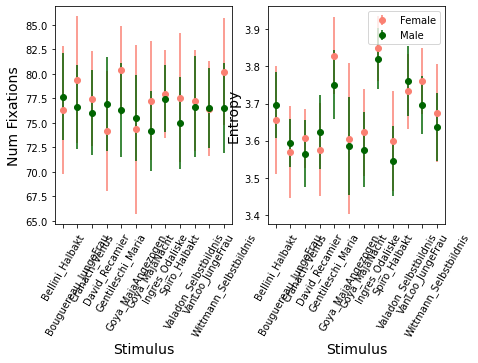

In [17]:
MyDat.CompareGroupsFix('PartGend')

In [22]:
 Entropies,EntropMax,EntropiesInd=MyDat.GetEntropies()

0 Bellini_Halbakt 5.65 maximum entropy 6.93
1 Bouguereau_JungeFrau 5.09 maximum entropy 5.97
2 Cranach_Venus 5.24 maximum entropy 6.27
3 David_Recamier 5.62 maximum entropy 6.93
4 Gentileschi_Maria 5.91 maximum entropy 6.97


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


5 Goya_MajaAngezogen 5.51 maximum entropy 7.0
6 Goya_MajaNacht 5.5 maximum entropy 6.9
7 Ingres_Odaliske 6.12 maximum entropy 7.15
8 Spiro_Halbakt 5.47 maximum entropy 6.41
9 Valadon_Selbstbildnis 5.92 maximum entropy 7.12
10 VanLoo_JungeFrau 5.57 maximum entropy 6.34
11 Wittmann_Selbstbildnis 5.47 maximum entropy 6.38


In [20]:
np.shape(EntropiesInd)

(56, 12)

In [17]:
EntropMax

array([6.92755791, 5.97126184, 6.26720055, 6.93342303, 6.96979067,
       7.00306546, 6.89770494, 7.14991684, 6.41181827, 7.12286666,
       6.3403593 , 6.37672695])

In [18]:
FixCountInd=MyDat.FixCountCalc('Bellini_Halbakt')



In [169]:
np.shape(MyDat.BinnedCount(np.sum(MyDat.FixCountInd,0),'Bellini_Halbakt'))

(31, 51)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

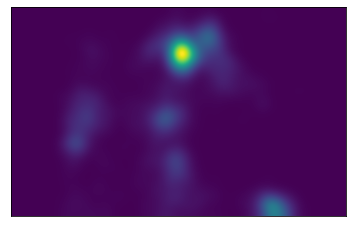

In [19]:
MyDat.Heatmap('Bellini_Halbakt',SD=50,Vis=1)

In [110]:
FixCountCalc()

KeyError: 1

In [25]:
MyDat.data['PartGend']=='Male'

0         True
1         True
2         True
3         True
4         True
         ...  
51610    False
51611    False
51612    False
51613    False
51614    False
Name: PartGend, Length: 51615, dtype: bool